In [90]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [91]:
#To import the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

#To see the first five rows of the data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [92]:
#To check data size
df.shape

(200, 6)

In [93]:
#To split data into target and predictor
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [94]:
y = df[['Drug']]
y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [95]:
# We should convert categorical values to numerical values in order to be able to work with Sklearn Decision Trees

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [96]:
#To split the data into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)

In [97]:
#Creating Decision Tree
drTree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [98]:
#To fit the model
drTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [99]:
#To predict
prTree = drTree.predict(x_test)

In [100]:
#To print
print(prTree[0:5])
print(y_test[0:5])

['drugX' 'drugX' 'drugY' 'drugY' 'drugX']
      Drug
72   drugX
30   drugX
188  drugY
77   drugY
14   drugX


In [101]:
#To find the accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prTree))

DecisionTrees's Accuracy:  1.0


KeyError: 4

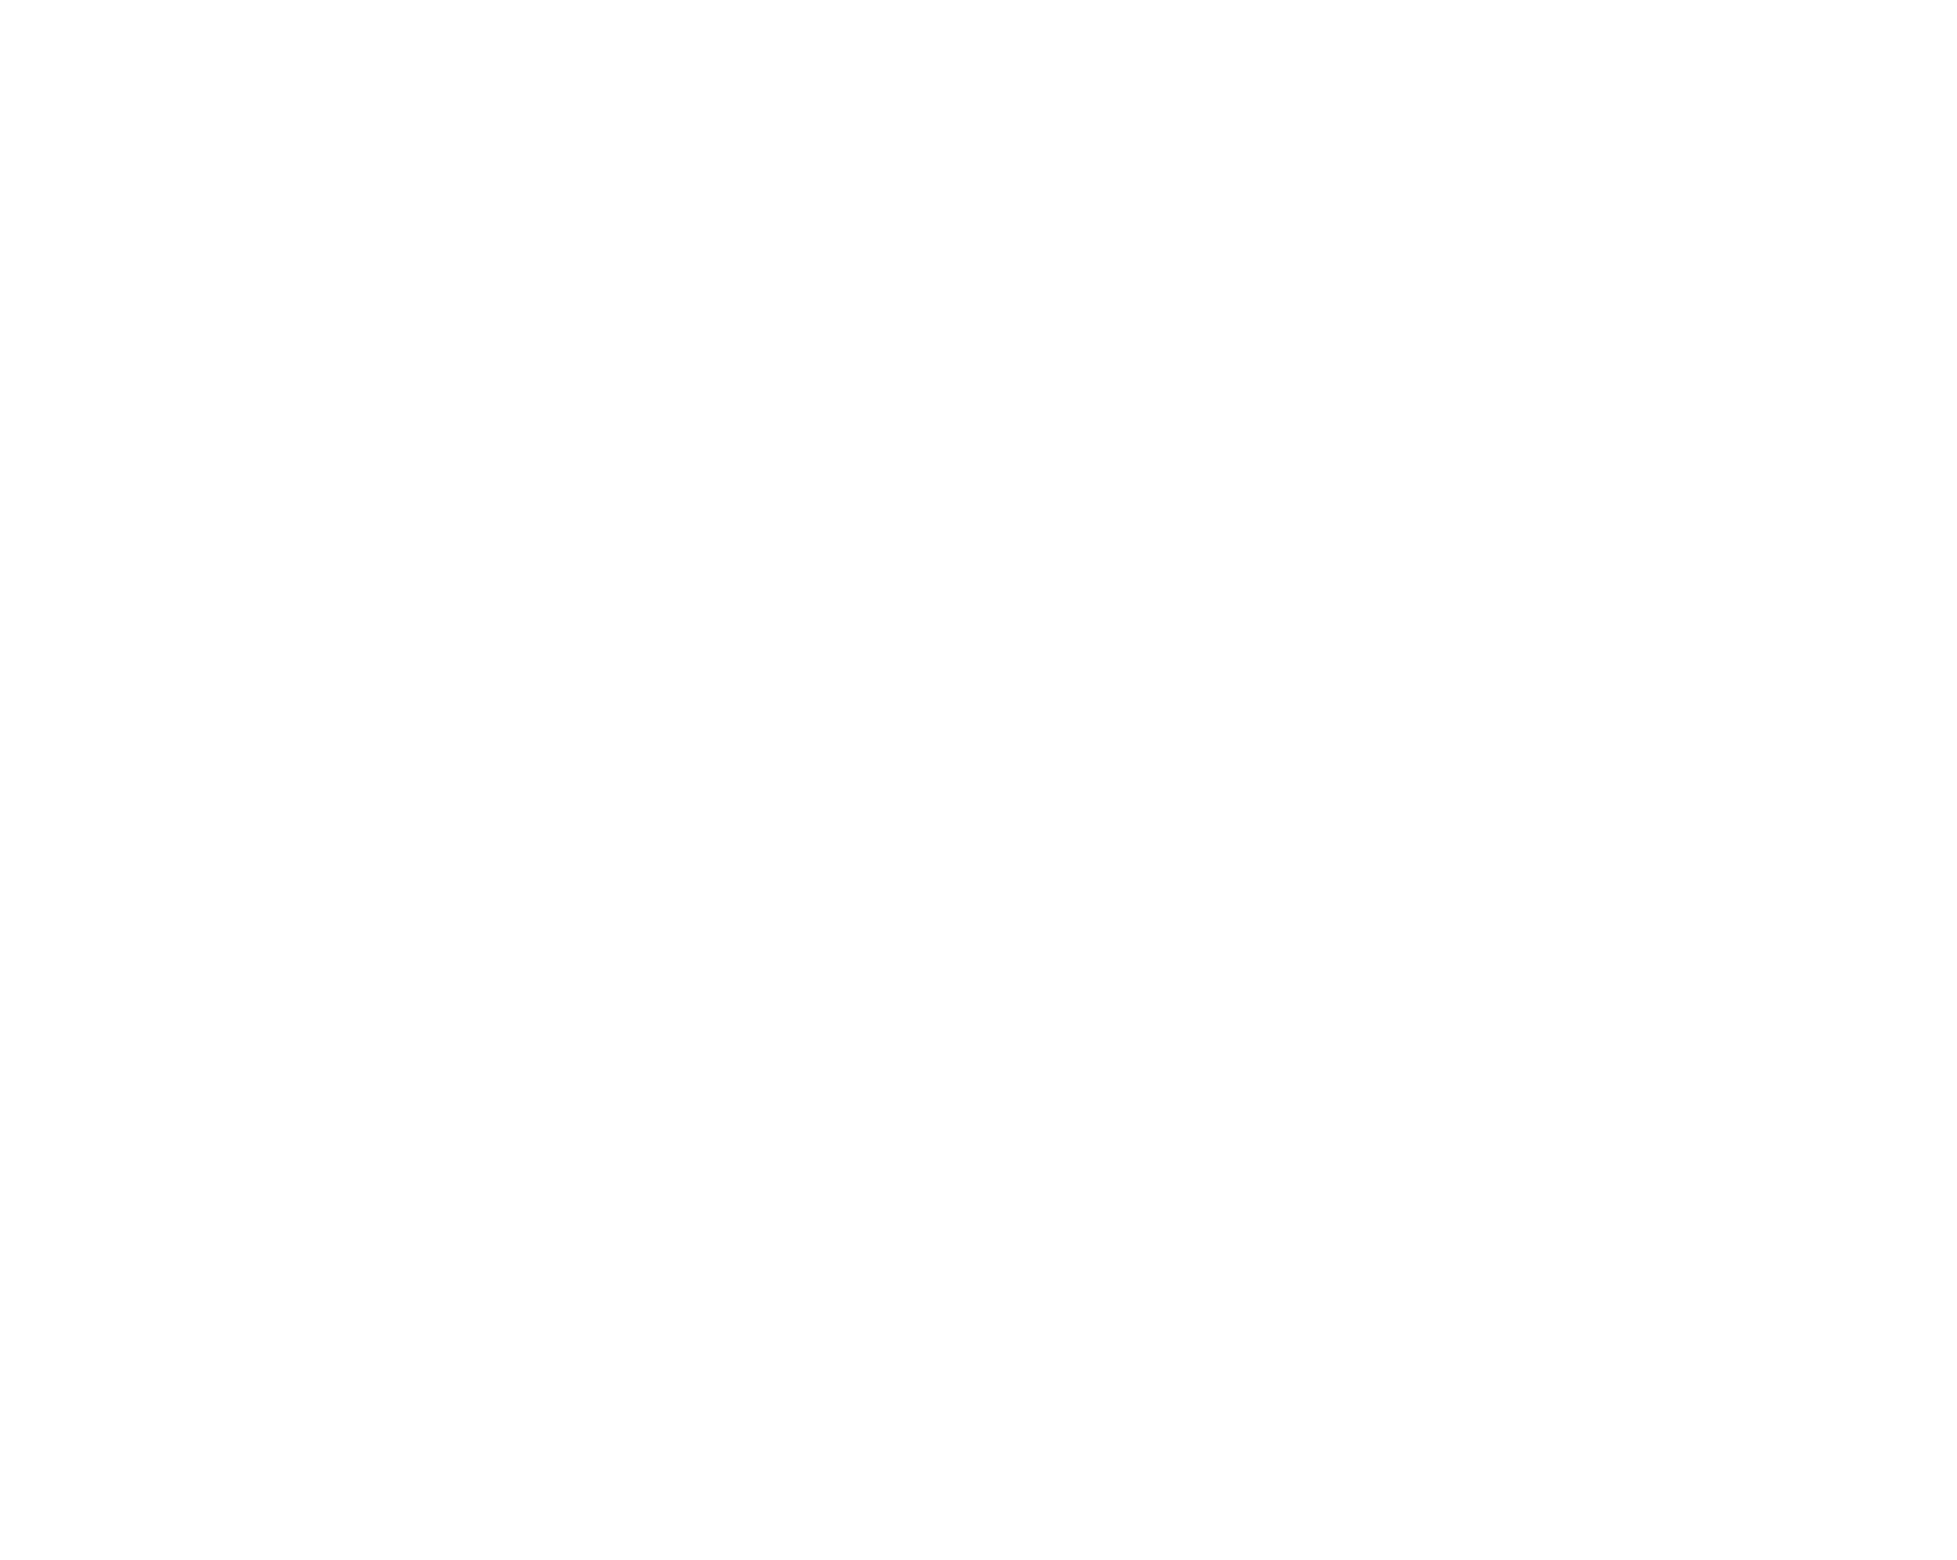

In [102]:
#To visualize the tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drTree, 
                   feature_names=x,  
                   class_names=y,
                   filled=True)